# Real Time Traffic Sign Recognition using CNN and OpenCV

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

import cv2
from sklearn.model_selection import train_test_split
import os
import random
from keras.preprocessing.image import ImageDataGenerator

## Parameters

In [2]:
path = "Data" 
labelFile = 'labels.csv' 
batch_size_val=50 
epochs_val=20
imageDimesions = (32,32,3)
testRatio = 0.2   
validationRatio = 0.2 

## Importing the Images

In [3]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


## Splitting Data into training and testing data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio) 

## Reading CSV file

In [5]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


In [6]:
data.head(10)

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [7]:
data.tail(10)

,ClassId,Name
33,33,Turn right ahead
34,34,Turn left ahead
35,35,Ahead only
36,36,Go straight or right
37,37,Go straight or left
38,38,Keep right
39,39,Keep left
40,40,Roundabout mandatory
41,41,End of no passing
42,42,End of no passing by vechiles over 3.5 metric ...


## Displaying some sample images 

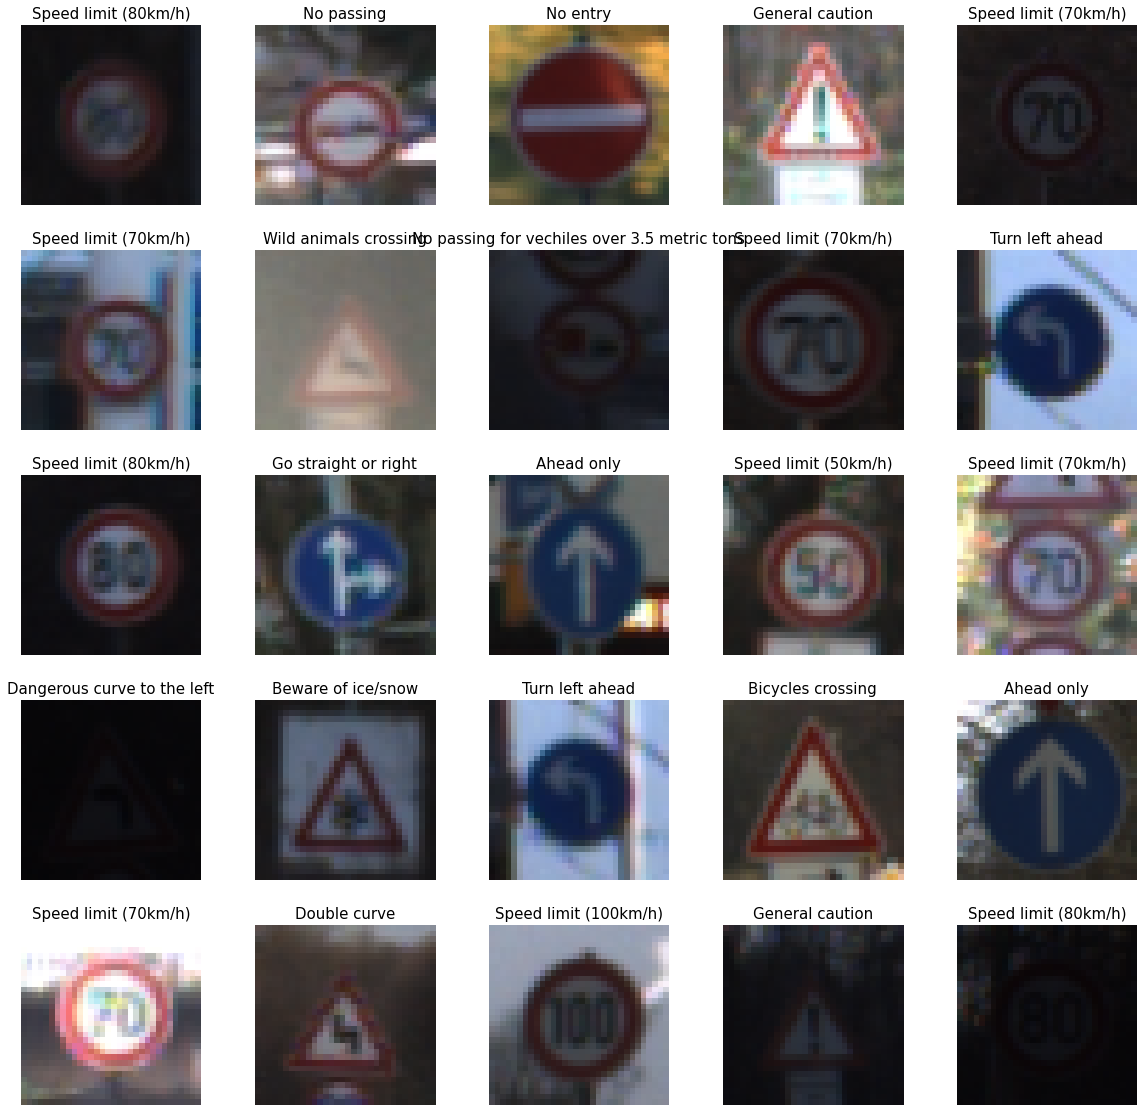

In [8]:
plt.figure(figsize=(20, 20))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(data['Name'][y_train[i]], fontsize=15)
    plt.axis("off")
    plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

## Displaying a bar chart showing number of samples for each catogory

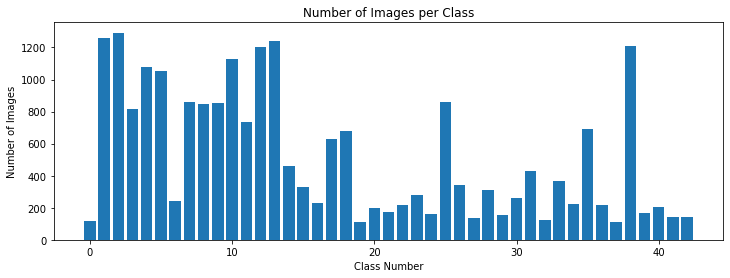

In [9]:
class_counts = np.bincount(y_train)

plt.figure(figsize=(12, 4))
plt.bar(range(noOfClasses), class_counts)
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")

plt.show()


### Preprocessing the images

In [10]:
def grayscale(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = grayscale(img)
    img = img.astype(np.uint8)
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = equalize(img)
    img = img/255
    return img

X_train=np.array(list(map(preprocessing,X_train))) 
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)])

In [11]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [12]:
# IMAGE AUGUMENTATAION

dataGen= ImageDataGenerator(width_shift_range=0.1, 
                            height_shift_range=0.1,
                            zoom_range=0.2, 
                            shear_range=0.1,  
                            rotation_range=10) 
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20) 
X_batch,y_batch = next(batches)

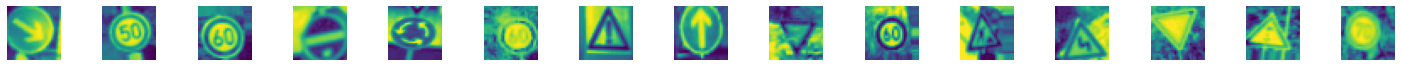

In [13]:
# TO SHOW AUGUMENTED IMAGE SAMPLES

fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

### Convolution neural network model

In [14]:
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5)
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  
    no_Of_Nodes = 500 
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) 
 
    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(noOfClasses,activation='softmax')) 

    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

### Training

In [15]:
model = myModel()
print(model.summary())
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

C:\Users\Varun\AppData\Local\Temp\ipykernel_6972\3216716611.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)


446/446 [==============================] - 71s 157ms/step - loss: 2.6078 - accuracy: 0.2806 - val_loss: 0.9367 - val_accuracy: 0.7329
Epoch 2/20
446/446 [==============================] - 71s 158ms/step - loss: 1.3155 - accuracy: 0.5983 - val_loss: 0.3650 - val_accuracy: 0.9045
Epoch 3/20
446/446 [==============================] - 70s 158ms/step - loss: 0.9226 - accuracy: 0.7162 - val_loss: 0.2631 - val_accuracy: 0.9228
Epoch 4/20
446/446 [==============================] - 79s 178ms/step - loss: 0.7075 - accuracy: 0.7771 - val_loss: 0.1647 - val_accuracy: 0.9546
Epoch 5/20
446/446 [==============================] - 76s 170ms/step - loss: 0.5882 - accuracy: 0.8128 - val_loss: 0.1479 - val_accuracy: 0.9626
Epoch 6/20
446/446 [==============================] - 74s 165ms/step - loss: 0.5047 - accuracy: 0.8399 - val_loss: 0.1143 - val_accuracy: 0.9705
Epoch 7/20
446/446 [==============================] - 73s 163ms/step - loss: 0.4409 - accuracy: 0.8603 - val_loss: 0.1365 - val_accuracy: 0.9

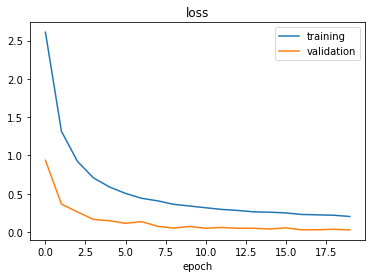

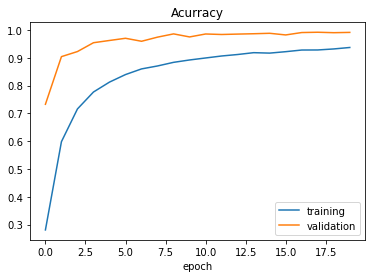

Test Score: 0.028154632076621056
Test Accuracy: 0.9925287365913391


In [16]:
# Plot

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [ ]:
from keras.models import load_model

model.save('my_model.h5') 
cv2.waitKey(0)